<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

# ODSC &mdash; FXCM Basics

## Risk Disclaimer

Trading forex/CFDs on margin carries a high level of risk and may not be suitable for all investors as you could sustain losses in excess of deposits. Leverage can work against you. Due to the certain restrictions imposed by the local law and regulation, German resident retail client(s) could sustain a total loss of deposited funds but are not subject to subsequent payment obligations beyond the deposited funds. Be aware and fully understand all risks associated with the market and trading. Prior to trading any products, carefully consider your financial situation and experience level. Any opinions, news, research, analyses, prices, or other information is provided as general market commentary, and does not constitute investment advice. FXCM & TPQ will not accept liability for any loss or damage, including without limitation to, any loss of profit, which may arise directly or indirectly from use of or reliance on such information.


## Speaker Disclaimer

The speaker is neither an employee, agent nor representative of FXCM and is therefore acting independently. The opinions given are their own, constitute general market commentary, and do not constitute the opinion or advice of FXCM or any form of personal or investment advice. FXCM assumes no responsibility for any loss or damage, including but not limited to, any loss or gain arising out of the direct or indirect use of this or any other content. Trading forex/CFDs on margin carries a high level of risk and may not be suitable for all investors as you could sustain losses in excess of deposits.

## The Imports

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
from pylab import plt
plt.style.use('seaborn')
%matplotlib inline

## Retrieving Tick Data

In [2]:
# from fxcmpy import fxcmpy_tick_data_reader as tdr

In [3]:
# print(tdr.get_available_symbols())

In [4]:
# start = dt.datetime(2018, 9, 4)
# stop = dt.datetime(2018, 9, 5)

In [5]:
# td = tdr('EURUSD', start, stop)

In [6]:
# td.get_raw_data().info()

In [7]:
# td.get_data().info()

In [8]:
# td.get_data().head()

## Retrieving Candles Data

In [9]:
from fxcmpy import fxcmpy_candles_data_reader as cdr

In [10]:
print(cdr.get_available_symbols())

('AUDCAD', 'AUDCHF', 'AUDJPY', 'AUDNZD', 'CADCHF', 'EURAUD', 'EURCHF', 'EURGBP', 'EURJPY', 'EURUSD', 'GBPCHF', 'GBPJPY', 'GBPNZD', 'GBPUSD', 'GBPCHF', 'GBPJPY', 'GBPNZD', 'NZDCAD', 'NZDCHF', 'NZDJPY', 'NZDUSD', 'USDCAD', 'USDCHF', 'USDJPY')


In [11]:
start = dt.datetime(2018, 5, 1)
stop = dt.datetime(2018, 7, 6)

`period` must be one of `m1`, `H1` or `D1`

In [12]:
period = 'H1'

In [13]:
candles = cdr('EURUSD', start, stop, period)

In [14]:
data = candles.get_data()

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1200 entries, 2018-04-29 21:00:00 to 2018-07-06 20:00:00
Data columns (total 8 columns):
BidOpen     1200 non-null float64
BidHigh     1200 non-null float64
BidLow      1200 non-null float64
BidClose    1200 non-null float64
AskOpen     1200 non-null float64
AskHigh     1200 non-null float64
AskLow      1200 non-null float64
AskClose    1200 non-null float64
dtypes: float64(8)
memory usage: 84.4 KB


In [16]:
data[data.columns[:4]].head()

,BidOpen,BidHigh,BidLow,BidClose
2018-04-29 21:00:00,1.21226,1.21299,1.21226,1.21277
2018-04-29 22:00:00,1.21277,1.21287,1.21202,1.21215
2018-04-29 23:00:00,1.21215,1.21228,1.21190,1.21227
2018-04-30 00:00:00,1.21227,1.21319,1.21217,1.21286
2018-04-30 01:00:00,1.21286,1.21341,1.21214,1.21333


In [17]:
data[data.columns[4:]].head()

,AskOpen,AskHigh,AskLow,AskClose
2018-04-29 21:00:00,1.21249,1.21311,1.21248,1.21289
2018-04-29 22:00:00,1.21289,1.21291,1.21203,1.21217
2018-04-29 23:00:00,1.21217,1.21230,1.21190,1.21228
2018-04-30 00:00:00,1.21228,1.21321,1.21218,1.21288
2018-04-30 01:00:00,1.21288,1.21343,1.21216,1.21334


In [18]:
data['MidClose'] = data[['BidClose', 'AskClose']].mean(axis=1)

In [19]:
data['SMA1'] = data['MidClose'].rolling(30).mean()
data['SMA2'] = data['MidClose'].rolling(100).mean()

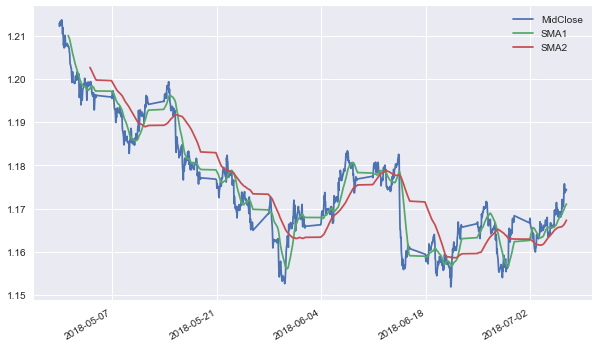

In [20]:
data[['MidClose', 'SMA1', 'SMA2']].plot(figsize=(10, 6));

## Connecting to the API

In [21]:
import fxcmpy

In [22]:
fxcmpy.__version__

'1.1.28'

In [23]:
api = fxcmpy.fxcmpy(config_file='../fxcm.cfg')  # adjust path/filename

In [24]:
instruments = api.get_instruments()

In [25]:
print(instruments)

['EUR/USD', 'XAU/USD', 'GBP/USD', 'UK100', 'USDOLLAR', 'XAG/USD', 'GER30', 'FRA40', 'USD/CNH', 'EUR/JPY', 'USD/JPY', 'CHN50', 'GBP/JPY', 'AUD/JPY', 'CHF/JPY', 'USD/CHF', 'GBP/CHF', 'AUD/USD', 'EUR/AUD', 'EUR/CHF', 'EUR/CAD', 'EUR/GBP', 'AUD/CAD', 'NZD/USD', 'USD/CAD', 'CAD/JPY', 'GBP/AUD', 'NZD/JPY', 'US30', 'GBP/CAD', 'SOYF', 'GBP/NZD', 'AUD/NZD', 'USD/SEK', 'EUR/SEK', 'EUR/NOK', 'USD/NOK', 'USD/MXN', 'AUD/CHF', 'EUR/NZD', 'USD/ZAR', 'USD/HKD', 'ZAR/JPY', 'USD/TRY', 'EUR/TRY', 'NZD/CHF', 'CAD/CHF', 'NZD/CAD', 'TRY/JPY', 'AUS200', 'ESP35', 'HKG33', 'JPN225', 'NAS100', 'SPX500', 'Copper', 'EUSTX50', 'USOil', 'UKOil', 'NGAS', 'Bund']


## Retrieving Historical Data

In [26]:
start = dt.datetime(2017, 1, 1) 
end = dt.datetime(2018, 1, 1)

In [27]:
candles = api.get_candles('EUR/USD', period='D1',
                         start=start, stop=end)

In [28]:
candles.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 309 entries, 2017-01-03 22:00:00 to 2018-01-01 22:00:00
Data columns (total 9 columns):
bidopen     309 non-null float64
bidclose    309 non-null float64
bidhigh     309 non-null float64
bidlow      309 non-null float64
askopen     309 non-null float64
askclose    309 non-null float64
askhigh     309 non-null float64
asklow      309 non-null float64
tickqty     309 non-null int64
dtypes: float64(8), int64(1)
memory usage: 24.1 KB


The parameter `period` must be one of `m1, m5, m15, m30, H1, H2, H3, H4, H6, H8, D1, W1` or `M1`.

In [29]:
candles = api.get_candles('EUR/USD', period='m1', number=250)

In [31]:
candles.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2018-09-20 06:48:00 to 2018-09-20 10:57:00
Data columns (total 9 columns):
bidopen     250 non-null float64
bidclose    250 non-null float64
bidhigh     250 non-null float64
bidlow      250 non-null float64
askopen     250 non-null float64
askclose    250 non-null float64
askhigh     250 non-null float64
asklow      250 non-null float64
tickqty     250 non-null int64
dtypes: float64(8), int64(1)
memory usage: 19.5 KB


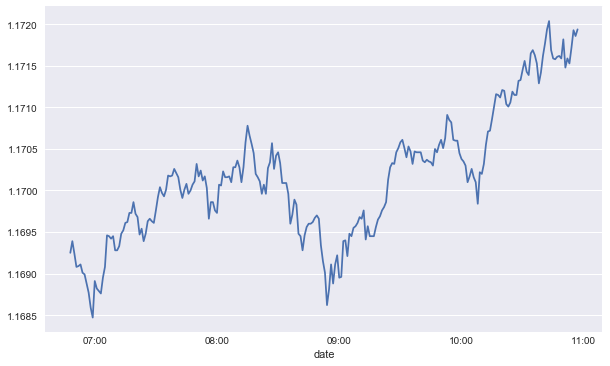

In [30]:
candles['askclose'].plot(figsize=(10, 6));

## Streaming Data

In [32]:
def output(data, dataframe):
    print('%3d | %s | %s | %6.5f, %6.5f' 
          % (len(dataframe), data['Symbol'],
             pd.to_datetime(int(data['Updated']), unit='ms'), 
             data['Rates'][0], data['Rates'][1]))

In [33]:
api.subscribe_market_data('EUR/USD', (output,))

  1 | EUR/USD | 2018-09-20 10:59:50.550000 | 1.17194, 1.17207
  2 | EUR/USD | 2018-09-20 10:59:50.986000 | 1.17196, 1.17208
  3 | EUR/USD | 2018-09-20 10:59:51.642000 | 1.17195, 1.17207
  4 | EUR/USD | 2018-09-20 10:59:52.024000 | 1.17195, 1.17208
  5 | EUR/USD | 2018-09-20 10:59:53.410000 | 1.17196, 1.17208
  6 | EUR/USD | 2018-09-20 10:59:54.276000 | 1.17195, 1.17208
  7 | EUR/USD | 2018-09-20 10:59:55.657000 | 1.17197, 1.17209
  8 | EUR/USD | 2018-09-20 10:59:56.611000 | 1.17196, 1.17209
  9 | EUR/USD | 2018-09-20 10:59:56.981000 | 1.17196, 1.17209
 10 | EUR/USD | 2018-09-20 10:59:57.657000 | 1.17197, 1.17210
 11 | EUR/USD | 2018-09-20 10:59:58.182000 | 1.17200, 1.17211
 12 | EUR/USD | 2018-09-20 10:59:58.680000 | 1.17202, 1.17213
 13 | EUR/USD | 2018-09-20 10:59:59.011000 | 1.17201, 1.17213
 14 | EUR/USD | 2018-09-20 10:59:59.356000 | 1.17201, 1.17213
 15 | EUR/USD | 2018-09-20 11:00:00.170000 | 1.17200, 1.17212
 16 | EUR/USD | 2018-09-20 11:00:00.986000 | 1.17197, 1.17209
 17 | EU

In [34]:
api.get_last_price('EUR/USD')

Bid     1.17197
Ask     1.17210
High    1.17214
Low     1.16682
Name: 2018-09-20 11:00:02.183000, dtype: float64

 19 | EUR/USD | 2018-09-20 11:00:02.696000 | 1.17197, 1.17209
 20 | EUR/USD | 2018-09-20 11:00:02.807000 | 1.17197, 1.17209
 21 | EUR/USD | 2018-09-20 11:00:03.705000 | 1.17197, 1.17208
 22 | EUR/USD | 2018-09-20 11:00:04.053000 | 1.17198, 1.17209
 23 | EUR/USD | 2018-09-20 11:00:04.608000 | 1.17198, 1.17211
 24 | EUR/USD | 2018-09-20 11:00:05.187000 | 1.17199, 1.17211
 25 | EUR/USD | 2018-09-20 11:00:05.646000 | 1.17200, 1.17212
 26 | EUR/USD | 2018-09-20 11:00:06.165000 | 1.17198, 1.17211
 27 | EUR/USD | 2018-09-20 11:00:06.497000 | 1.17198, 1.17210
 28 | EUR/USD | 2018-09-20 11:00:07.208000 | 1.17199, 1.17210
 29 | EUR/USD | 2018-09-20 11:00:07.521000 | 1.17196, 1.17208
 30 | EUR/USD | 2018-09-20 11:00:09.207000 | 1.17198, 1.17211
 31 | EUR/USD | 2018-09-20 11:00:09.496000 | 1.17199, 1.17211
 32 | EUR/USD | 2018-09-20 11:00:10.118000 | 1.17199, 1.17212
 33 | EUR/USD | 2018-09-20 11:00:10.705000 | 1.17196, 1.17209
 34 | EUR/USD | 2018-09-20 11:00:11.125000 | 1.17197, 1.17209


In [35]:
api.unsubscribe_market_data('EUR/USD') 

 35 | EUR/USD | 2018-09-20 11:00:11.581000 | 1.17196, 1.17208
 36 | EUR/USD | 2018-09-20 11:00:11.771000 | 1.17196, 1.17209


## Placing Orders

In [37]:
api.get_open_positions()

""


In [38]:
order = api.create_market_buy_order('EUR/USD', 10)

In [39]:
sel = ['tradeId', 'amountK', 'currency',
       'grossPL', 'isBuy']

In [40]:
api.get_open_positions()[sel]

,tradeId,amountK,currency,grossPL,isBuy
0,130986397,10,EUR/USD,-1.28022,True


In [41]:
order = api.create_market_buy_order('EUR/USD', 5)

In [42]:
api.get_open_positions()[sel]

,tradeId,amountK,currency,grossPL,isBuy
0,130986397,10,EUR/USD,-1.36558,True
1,130986410,5,EUR/USD,-0.46942,True


In [43]:
order = api.create_market_sell_order('EUR/USD', 7)

In [44]:
api.get_open_positions()[sel]

,tradeId,amountK,currency,grossPL,isBuy
0,130986397,10,EUR/USD,-0.25602,True
1,130986410,5,EUR/USD,0.08534,True
2,130986416,7,EUR/USD,-1.07516,False


In [45]:
# api.close_all()

In [46]:
api.close_all_for_symbol('EUR/USD')

In [47]:
api.get_open_positions()

""


## Account Information

In [48]:
api.get_default_account()

1090495

In [49]:
api.get_accounts().T

,0
accountId,1090495
accountName,01090495
balance,4959.29
dayPL,-1.28
equity,4959.29
grossPL,0
hedging,Y
mc,N
mcDate,
ratePrecision,0


<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

<a href="http://tpq.io" target="_blank">http://tpq.io</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a> | <a href="mailto:training@tpq.io">training@tpq.io</a>